In [12]:
from astropy.io import fits
import numpy as np
import os
import matplotlib.pyplot as plt
from astropy.stats import SigmaClip
from photutils.background import Background2D, SExtractorBackground
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.visualization import LogStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from scipy import ndimage
from scipy.ndimage import gaussian_filter
import little_things_functions as ltf
import cv2
from scipy.optimize import curve_fit
from matplotlib.patches import Ellipse
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from matplotlib.colors import Normalize
from matplotlib import cm
from scipy.fft import fft2, fftshift
import os
import numpy as np
from astropy.io import fits
from skimage.transform import AffineTransform, warp
import matplotlib.pyplot as plt
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import LogStretch
from scipy.ndimage import gaussian_filter
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import little_things_functions as ltf
import math

# DDO 43

## RD

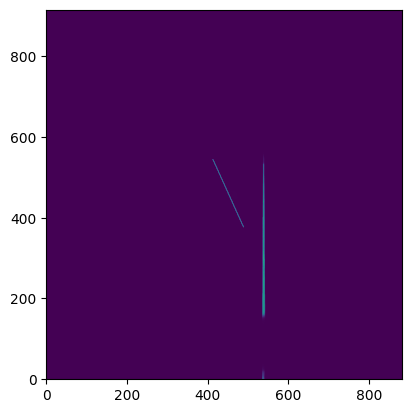

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


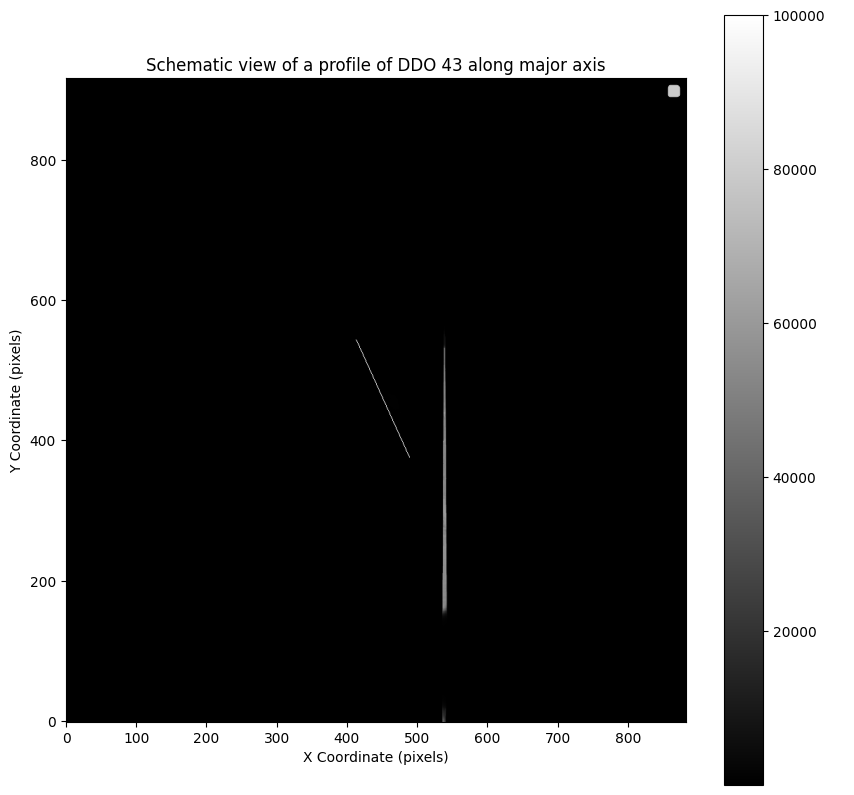

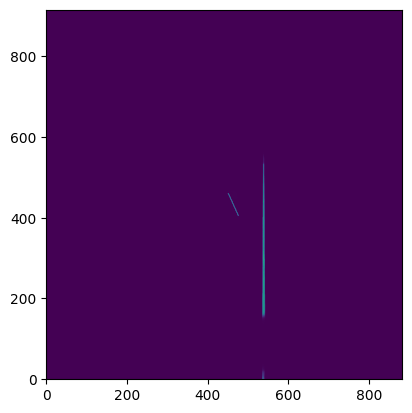

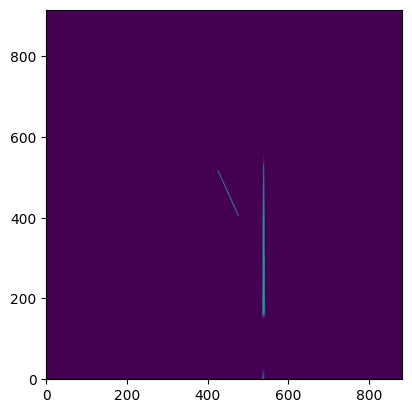

x_ax_left length: 56
x_ax_right length: 56
values_along_line_left length: 56
values_along_line_right length: 56
x_ax combined length: 112
values_along_line combined length: 112


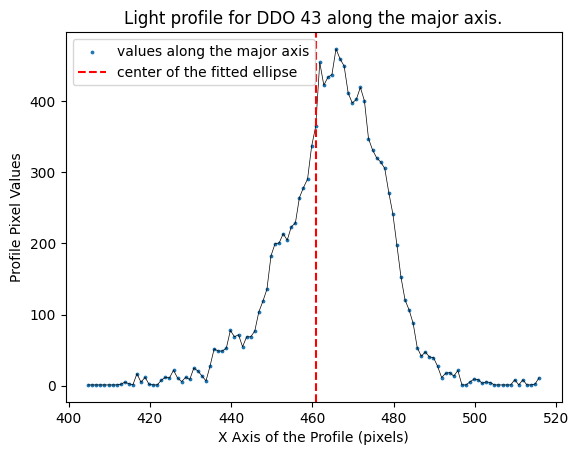

Threshold value: 241.4427059256851
Center of galaxy (Equal Area on both sides of the center line): 465.826


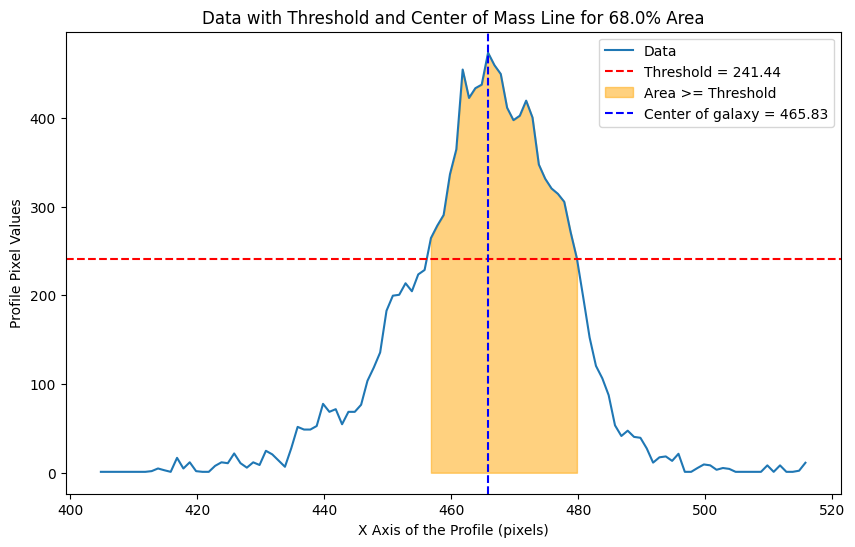

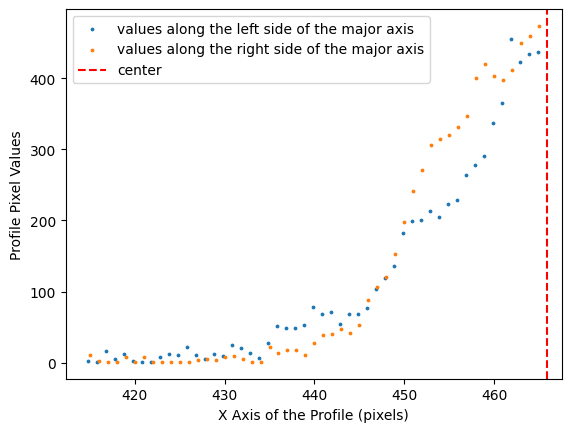

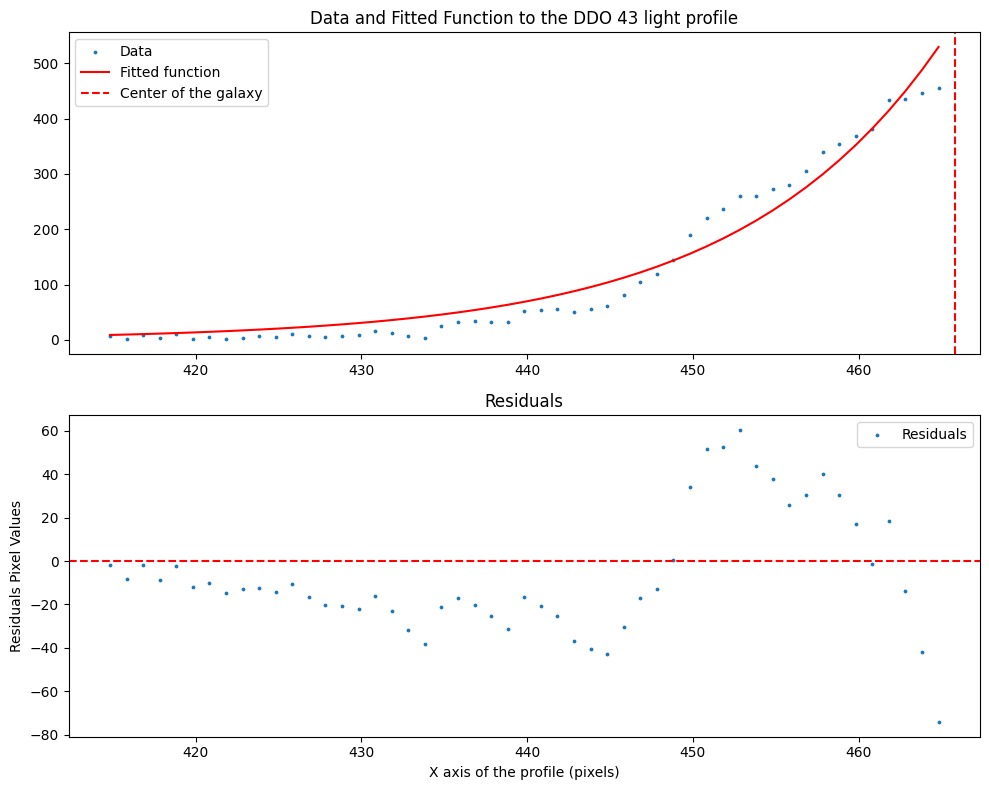

Exponential fit function is a * exp(b * (x - x0)) + c
a is 0.0000 +/- 0.0000
b is 0.0816 +/- 0.0036
c is 54.2144 +/- 5137668.8178
RD is 12.2606 pixels
RD for DDO 43 is 0.3707330477539979 kpc
RD for DDO 43 in paper is 0.43 kpc


In [13]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from astropy.visualization import ImageNormalize, LogStretch
import numpy as np

galaxy_name = "DDO 43"
D = 5.5
x_start = 400
y_start = 390
a_half = 28
b_half = 15
theta_deg = 24.334
X_center = 60.826 + x_start
y_center = 63.723 + y_start
visual_43 = np.array(ltf.open_fits(r"C:\Users\AYSAN\Desktop\project\Galaxy\Starless images\DDO43\non_shifted_background_d43v.fits"))
#visual_43 = visual_43[y_start:y_start + int(2 * X_center), x_start: int(x_start + 2 * y_center)]

theta_rad = np.radians(180-theta_deg)
list_of_ellipse_data = [theta_rad , a_half, b_half]
x_ax_left = np.arange(X_center - 3*a_half, X_center)
x_ax_right = np.arange(X_center , X_center + 3*a_half)
x_ax = np.concatenate((x_ax_left, x_ax_right))
def get_line_values(image, x_ax, center_of_galaxy_y, theta_rad):
    m = np.tan(theta_rad)
    values = []
    y_list = []
    for x in x_ax:
        y = int(m * x + center_of_galaxy_y - (m)*(y_center))
        y = int(y)
        x = int(x)
        if 0 <= y < image.shape[0] and 0 <= x < image.shape[1]:
            values.append(image[y, x])
            image[x,y] = 100000
            y_list.append(y)
    plt.imshow(image, origin = 'lower')
    plt.show()
    return values, y_list
get_line_values(visual_43, x_ax, y_center, theta_rad)

fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(visual_43, cmap='gray', origin='lower')
cbar = plt.colorbar(im, ax=ax)
cbar.set_label(" ")
plt.title(f"Schematic view of a profile of {galaxy_name} along major axis")
plt.xlabel('X Coordinate (pixels)')
plt.ylabel('Y Coordinate (pixels)')
plt.legend()
plt.show()


DDO_43 = np.array(ltf.open_fits(r"C:\Users\AYSAN\Desktop\project\Galaxy\Starless images\DDO43\non_shifted_background_d43v.fits"))
#DDO_43 = DDO_43[y_start:y_start + int(2 * X_center), x_start: int(x_start + 2 * y_center)]

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def RD(image, distance, pixel_scale, list_of_ellipse_data, center_of_galaxy_x, center_of_galaxy_y, galaxy_name, ratio=0.68, initial_guesses=[45, 0.1, 25]):
    theta_rad = np.radians(180-theta_deg)
    
    x_ax_left = np.arange(center_of_galaxy_x - 2*a_half , center_of_galaxy_x)
    x_ax_right = np.arange(center_of_galaxy_x, center_of_galaxy_x + 2*a_half)
    values_along_line_left, y_list_left = get_line_values(image, x_ax_left, center_of_galaxy_y, theta_rad)
    values_along_line_right, y_list_right = get_line_values(image, x_ax_right, center_of_galaxy_y, theta_rad)
    
    y_ax = np.concatenate((y_list_left, y_list_right))
    x_ax = np.concatenate((x_ax_left, x_ax_right))
    values_along_line = np.concatenate((values_along_line_left, values_along_line_right))

    # Add print statements to debug the lengths
    print(f"x_ax_left length: {len(x_ax_left)}")
    print(f"x_ax_right length: {len(x_ax_right)}")
    print(f"values_along_line_left length: {len(values_along_line_left)}")
    print(f"values_along_line_right length: {len(values_along_line_right)}")

    print(f"x_ax combined length: {len(x_ax)}")
    print(f"values_along_line combined length: {len(values_along_line)}")

        
    if len(x_ax) == len(values_along_line):
        plt.scatter(x_ax, values_along_line, s=3, label='values along the major axis')
        plt.plot(x_ax, values_along_line, color="black", linewidth=0.5)
        plt.title(f"Light profile for {galaxy_name} along the major axis.")
        plt.axvline(x=center_of_galaxy_x, color='r', linestyle='--', label='center of the fitted ellipse')
        plt.xlabel("X Axis of the Profile (pixels)")
        plt.ylabel("Profile Pixel Values")
        plt.legend()
        plt.show()
    else:
        print("The lengths of x_ax and values_along_line do not match.")
        print(len(x_ax))
        print(len(values_along_line))
        return
    
    values_along_line = np.array(values_along_line)
    x_ax = np.array(x_ax)
    
    total_area = np.trapz(values_along_line, x=x_ax)
    
    sorted_values = np.sort(values_along_line)[::-1]
    cumulative_area = np.cumsum(sorted_values) * (x_ax[1] - x_ax[0])
    
    threshold_index = np.searchsorted(cumulative_area, ratio * total_area)
    threshold_value = sorted_values[threshold_index]
    
    filtered_values = values_along_line[values_along_line > threshold_value]
    filtered_x_ax = x_ax[values_along_line > threshold_value]
    
    cumulative_intensity = np.cumsum(values_along_line)
    total_intensity = cumulative_intensity[-1]
    
    com_index = np.searchsorted(cumulative_intensity, total_intensity / 2)
    center_of_mass_x = x_ax[com_index]
    center_of_mass_y = y_ax[com_index]
    print(f"Threshold value: {threshold_value}")
    print(f"Center of galaxy (Equal Area on both sides of the center line): {center_of_mass_x}")
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_ax, values_along_line, label='Data')
    plt.axhline(y=threshold_value, color='r', linestyle='--', label=f'Threshold = {threshold_value:.2f}')
    plt.fill_between(x_ax, values_along_line, where=(values_along_line >= threshold_value), color='orange', alpha=0.5, label='Area >= Threshold')
    plt.axvline(x=center_of_mass_x, color='blue', linestyle='--', label=f'Center of galaxy = {center_of_mass_x:.2f}')
    plt.legend()
    plt.xlabel("X Axis of the Profile (pixels)")
    plt.ylabel("Profile Pixel Values")
    plt.title(f'Data with Threshold and Center of Mass Line for {ratio * 100}% Area')
    plt.show()

    values_along_line_left = values_along_line[:com_index]
    values_along_line_right = values_along_line[com_index:]

    x_ax_left = x_ax[:com_index]
    x_ax_right = x_ax[com_index:]

    if len(x_ax_left) > len(x_ax_right):
        delete = len(x_ax_left) - len(x_ax_right)
        x_ax_left = x_ax_left[delete:]
        values_along_line_left = values_along_line_left[delete:]
    elif len(x_ax_left) < len(x_ax_right):
        delete = len(x_ax_right) - len(x_ax_left)
        x_ax_right = x_ax_right[:-delete]
        values_along_line_right = values_along_line_right[:-delete]

    flipped_x_ax_right = []
    for i in range(len(x_ax_right)):
        x = (2 * center_of_mass_x - x_ax_right[i])
        flipped_x_ax_right.append(int(x))

    flipped_x_ax_right = np.array(flipped_x_ax_right)

    plt.scatter(x_ax_left, values_along_line_left, s=3, label='values along the left side of the major axis')
    plt.scatter(flipped_x_ax_right, values_along_line_right, s=3, label='values along the right side of the major axis')
    plt.axvline(x=center_of_mass_x, color='r', linestyle='--', label='center')
    plt.xlabel("X Axis of the Profile (pixels)")
    plt.ylabel("Profile Pixel Values")
    plt.legend()
    plt.show()
    
    x1 = x_ax_left  
    x2 = flipped_x_ax_right
    y1 = values_along_line_left
    y2 = values_along_line_right[::-1]
    mean_y = (y1 + y2)/2
    
    def exponential_func(x, a, b, x0):
        return a * np.exp(b * (x - x0))

    popt, pcov = curve_fit(exponential_func, x_ax_left, mean_y, p0=initial_guesses)

    plt.figure(figsize=(10, 8))

    plt.subplot(2, 1, 1)
    plt.scatter(x_ax_left, mean_y, s=3, label='Data')
    plt.plot(x_ax_left, exponential_func(x_ax_left, *popt), label='Fitted function', color='red')
    plt.axvline(x=center_of_mass_x, color='r', linestyle='--', label='Center of the galaxy')
    plt.legend()
    plt.title(f'Data and Fitted Function to the {galaxy_name} light profile')
    residuals = mean_y - exponential_func(x_ax_left, *popt) 
    plt.subplot(2, 1, 2) 
    plt.scatter(x_ax_left, residuals, s=3, label='Residuals') 
    plt.axhline(0, color='red', linestyle='--') 
    plt.legend() 
    plt.xlabel('X axis of the profile (pixels)') 
    plt.ylabel('Residuals Pixel Values') 
    plt.title('Residuals') 
    plt.tight_layout() 
    plt.show()
    
    perr = np.sqrt(np.diag(pcov))
    print("Exponential fit function is a * exp(b * (x - x0)) + c")
    print(f"a is {popt[0]:.4f} +/- {perr[0]:.4f}")
    print(f"b is {popt[1]:.4f} +/- {perr[1]:.4f}")
    print(f"c is {popt[2]:.4f} +/- {perr[2]:.4f}")
    print(f"RD is {1/popt[1]:.4f} pixels")
    
    R_D_pixels = 1/popt[1]
    R_D_arcsec = R_D_pixels * pixel_scale
    RD_value = ((distance * R_D_arcsec) / 206265)*1000
    print(f"RD for {galaxy_name} is {RD_value} kpc")
    print(f"RD for {galaxy_name} in paper is 0.43 kpc")
    return R_D_pixels, RD_value

list_of_ellipse_data = [theta_rad , a_half, b_half]
RD_pixels , RD_kpc = RD(DDO_43, D, 1.134, list_of_ellipse_data, X_center, y_center, galaxy_name, initial_guesses=[1, 0.06, 25])

## SFR

In [14]:
H_alpha_43 = np.array(ltf.open_fits(r"c:\Users\AYSAN\Desktop\project\Galaxy\Data\DDO 43\d43hmrms.fits"))

sum_H_alpha = np.sum(H_alpha_43)

RD_circle = np.pi * (RD_pixels**2)
SFR = sum_H_alpha/RD_circle

print(f"SFR for {galaxy_name} is {SFR}")

SFR for DDO 43 is 4180.288048362616


# DDO 101

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


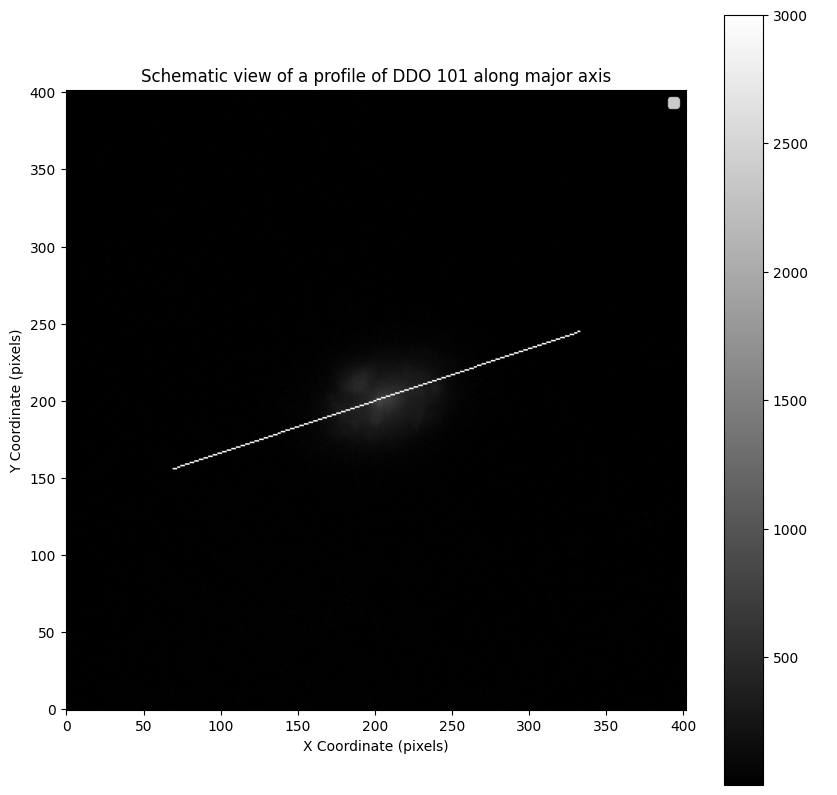

x_ax_left length: 132
x_ax_right length: 132
values_along_line_left length: 132
values_along_line_right length: 132
x_ax combined length: 264
values_along_line combined length: 264


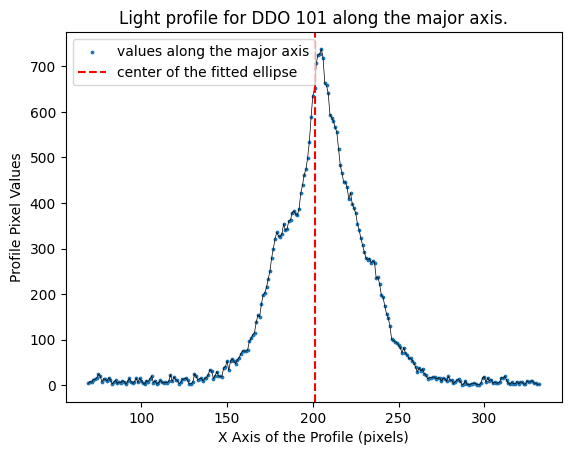

Threshold value: 325.58131654632496
Center of galaxy (Equal Area on both sides of the center line): 205


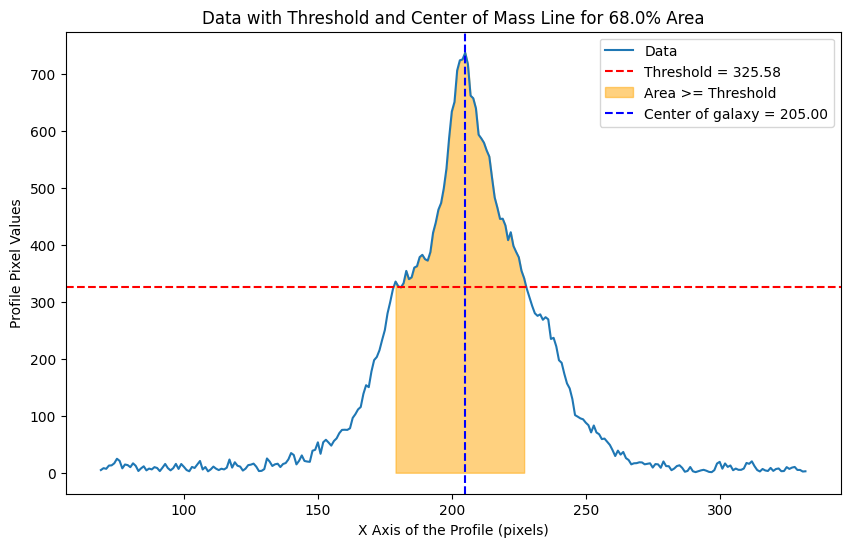

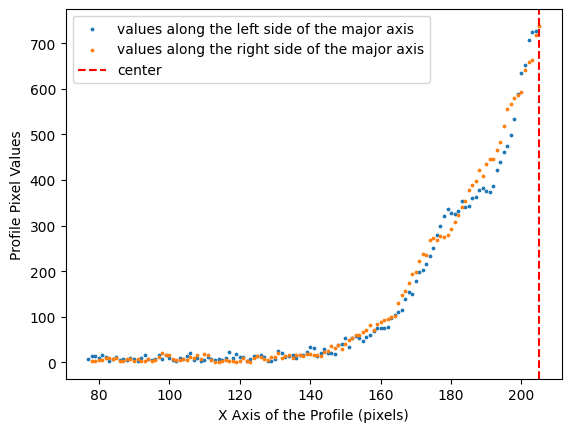

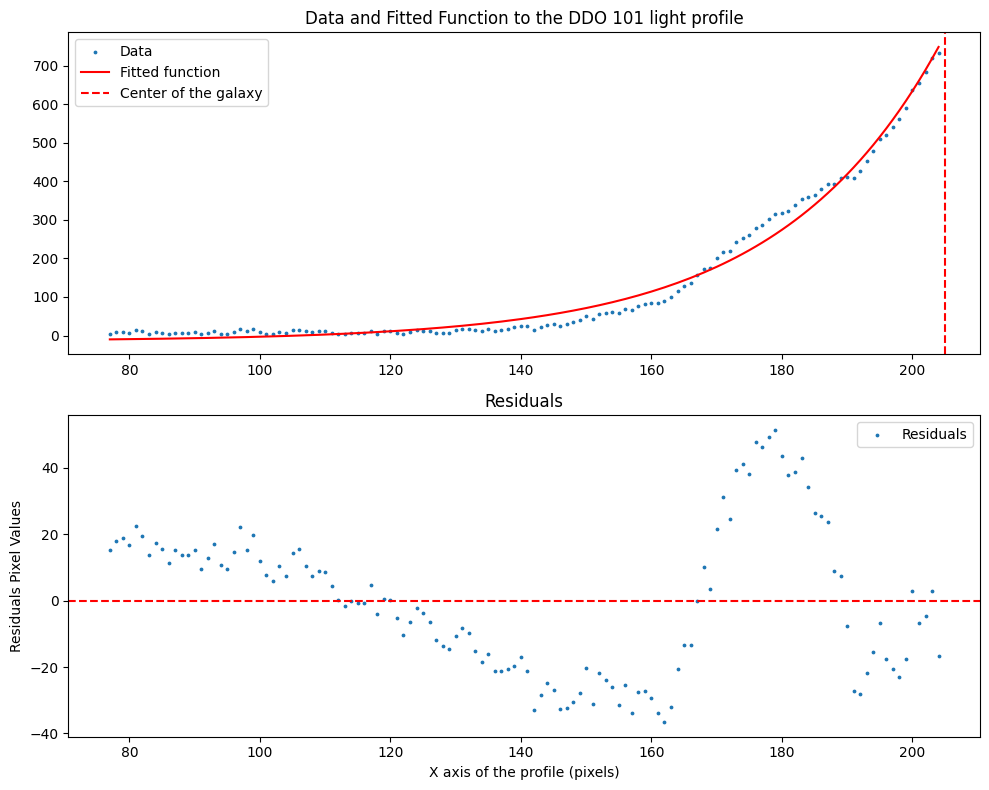

Exponential fit function is a * exp(b * (x - x0)) + c
a is 0.8617 +/- 680706.1580
b is 0.0405 +/- 0.0010
c is -14.5056 +/- 3.7333
x0 is 36.3507 +/- 19501931.4730
RD is 24.7043 pixels
RD for DDO 101 is 1.2223700333456264 kpc


In [15]:
galaxy_name = "DDO 101"
D = 9
x_start = 225
y_start = 300
a_half = 33
b_half = 21
theta_deg = 18.69986989
X_center = 201
y_center = 201
n = 4

theta_rad = np.radians(theta_deg)
list_of_ellipse_data = [theta_rad , a_half, b_half]
 
visual_101 = np.array(ltf.open_fits(r"C:\Users\AYSAN\Desktop\project\Galaxy\Starless images\DDO101\non_shifted_background_d101v.fits"))
visual_101 = visual_101[y_start:y_start + int(2 * X_center), x_start: int(x_start + 2 * y_center)]

x_ax_left = np.arange(X_center - n*a_half, X_center)
x_ax_right = np.arange(X_center, X_center + n*a_half)
x_ax = np.concatenate((x_ax_left, x_ax_right))
theta_rad = np.radians(theta_deg)

def get_line_values(array, X_center, y_center, x_ax, theta_rad): 
        m = np.tan(theta_rad)
        values = [] 
        y_list = [] 
        for x in x_ax: 
            y = int(m * (x) + y_center - m*X_center) 
            values.append(array[y, x]) 
            array[y, x] = 3000 
            y_list.append(y) 
        return values, y_list

get_line_values(visual_101, X_center, y_center, x_ax, theta_rad)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(visual_101, cmap='gray', origin='lower')
cbar = plt.colorbar(im, ax=ax)
cbar.set_label(" ")

plt.title(f"Schematic view of a profile of {galaxy_name} along major axis")
plt.xlabel('X Coordinate (pixels)')
plt.ylabel('Y Coordinate (pixels)')
plt.legend()
plt.show()

DDO_101 = np.array(ltf.open_fits(r"C:\Users\AYSAN\Desktop\project\Galaxy\Starless images\DDO101\non_shifted_background_d101v.fits"))
DDO_101 = DDO_101[y_start:y_start + int(2 * X_center), x_start: int(x_start + 2 * y_center)]

def RD(n, image, distance, pixel_scale, list_of_ellipse_data, center_of_galaxy_x, center_of_galaxy_y, galaxy_name, ratio=0.68, initial_guesses=[45, 0.1, 25, 0]):
    theta_rad, a, b = list_of_ellipse_data
    
    def get_line_values(array, X_center, y_center, x_ax, theta_rad): 
        m = np.tan(theta_rad)
        values = [] 
        y_list = [] 
        for x in x_ax: 
            y = int(m * (x) + y_center - m*X_center) 
            combined_value = 0.5* float(array[y,x]) + (1/8)*(float(array[y-1,x])+float(array[y+1,x])+float(array[y,x-1])+float(array[y,x+1]))
            values.append(combined_value) 
            y_list.append(y) 
        return values, y_list
        
    center_of_galaxy_x = int(center_of_galaxy_x)
    
    x_ax_left = np.arange(X_center - n*a_half, X_center)
    x_ax_right = np.arange(X_center, X_center + n*a_half)

    values_along_line_left, y_list_left = get_line_values(image, center_of_galaxy_x, center_of_galaxy_y,x_ax_left, theta_rad)
    values_along_line_right, y_list_right = get_line_values(image, center_of_galaxy_x, center_of_galaxy_y,x_ax_right ,theta_rad)
    
    y_ax = np.concatenate((y_list_left, y_list_right))
    x_ax = np.concatenate((x_ax_left, x_ax_right))
    values_along_line = np.concatenate((values_along_line_left, values_along_line_right))

    # Add print statements to debug the lengths
    print(f"x_ax_left length: {len(x_ax_left)}")
    print(f"x_ax_right length: {len(x_ax_right)}")
    print(f"values_along_line_left length: {len(values_along_line_left)}")
    print(f"values_along_line_right length: {len(values_along_line_right)}")

    print(f"x_ax combined length: {len(x_ax)}")
    print(f"values_along_line combined length: {len(values_along_line)}")

        
    if len(x_ax) == len(values_along_line):
        plt.scatter(x_ax, values_along_line, s=3, label='values along the major axis')
        plt.plot(x_ax, values_along_line, color="black", linewidth=0.5)
        plt.title(f"Light profile for {galaxy_name} along the major axis.")
        plt.axvline(x=center_of_galaxy_x, color='r', linestyle='--', label='center of the fitted ellipse')
        plt.xlabel("X Axis of the Profile (pixels)")
        plt.ylabel("Profile Pixel Values")
        plt.legend()
        plt.show()
    else:
        print("The lengths of x_ax and values_along_line do not match.")
        print(len(x_ax))
        print(len(values_along_line))
        return
    
    values_along_line = np.array(values_along_line)
    x_ax = np.array(x_ax)
    
    total_area = np.trapz(values_along_line, x=x_ax)
    
    sorted_values = np.sort(values_along_line)[::-1]
    cumulative_area = np.cumsum(sorted_values) * (x_ax[1] - x_ax[0])
    
    threshold_index = np.searchsorted(cumulative_area, ratio * total_area)
    threshold_value = sorted_values[threshold_index]
    
    filtered_values = values_along_line[values_along_line > threshold_value]
    filtered_x_ax = x_ax[values_along_line > threshold_value]
    
    cumulative_intensity = np.cumsum(values_along_line)
    total_intensity = cumulative_intensity[-1]
    
    com_index = np.searchsorted(cumulative_intensity, total_intensity / 2)
    center_of_mass_x = x_ax[com_index]
    center_of_mass_y = y_ax[com_index]
    print(f"Threshold value: {threshold_value}")
    print(f"Center of galaxy (Equal Area on both sides of the center line): {center_of_mass_x}")
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_ax, values_along_line, label='Data')
    plt.axhline(y=threshold_value, color='r', linestyle='--', label=f'Threshold = {threshold_value:.2f}')
    plt.fill_between(x_ax, values_along_line, where=(values_along_line >= threshold_value), color='orange', alpha=0.5, label='Area >= Threshold')
    plt.axvline(x=center_of_mass_x, color='blue', linestyle='--', label=f'Center of galaxy = {center_of_mass_x:.2f}')
    plt.legend()
    plt.xlabel("X Axis of the Profile (pixels)")
    plt.ylabel("Profile Pixel Values")
    plt.title(f'Data with Threshold and Center of Mass Line for {ratio * 100}% Area')
    plt.show()

    values_along_line_left = values_along_line[:com_index]
    values_along_line_right = values_along_line[com_index:]

    x_ax_left = x_ax[:com_index]
    x_ax_right = x_ax[com_index:]

    if len(x_ax_left) > len(x_ax_right):
        delete = len(x_ax_left) - len(x_ax_right)
        x_ax_left = x_ax_left[delete:]
        values_along_line_left = values_along_line_left[delete:]
    elif len(x_ax_left) < len(x_ax_right):
        delete = len(x_ax_right) - len(x_ax_left)
        x_ax_right = x_ax_right[:-delete]
        values_along_line_right = values_along_line_right[:-delete]

    flipped_x_ax_right = []
    for i in range(len(x_ax_right)):
        x = (2 * center_of_mass_x - x_ax_right[i])
        flipped_x_ax_right.append(int(x))

    flipped_x_ax_right = np.array(flipped_x_ax_right)

    plt.scatter(x_ax_left, values_along_line_left, s=3, label='values along the left side of the major axis')
    plt.scatter(flipped_x_ax_right, values_along_line_right, s=3, label='values along the right side of the major axis')
    plt.axvline(x=center_of_mass_x, color='r', linestyle='--', label='center')
    plt.xlabel("X Axis of the Profile (pixels)")
    plt.ylabel("Profile Pixel Values")
    plt.legend()
    plt.show()
    
    x1 = x_ax_left  
    x2 = flipped_x_ax_right
    y1 = values_along_line_left
    y2 = values_along_line_right[::-1]
    mean_y = (y1 + y2)/2
    
    def exponential_func(x, a, b, c, x0):
        return a * np.exp(b * (x - x0)) + c

    popt, pcov = curve_fit(exponential_func, x_ax_left, mean_y, p0=initial_guesses)

    plt.figure(figsize=(10, 8))

    plt.subplot(2, 1, 1)
    plt.scatter(x_ax_left, mean_y, s=3, label='Data')
    plt.plot(x_ax_left, exponential_func(x_ax_left, *popt), label='Fitted function', color='red')
    plt.axvline(x=center_of_mass_x, color='r', linestyle='--', label='Center of the galaxy')
    plt.legend()
    plt.title(f'Data and Fitted Function to the {galaxy_name} light profile')
    residuals = mean_y - exponential_func(x_ax_left, *popt) 
    plt.subplot(2, 1, 2) 
    plt.scatter(x_ax_left, residuals, s=3, label='Residuals') 
    plt.axhline(0, color='red', linestyle='--') 
    plt.legend() 
    plt.xlabel('X axis of the profile (pixels)') 
    plt.ylabel('Residuals Pixel Values') 
    plt.title('Residuals') 
    plt.tight_layout() 
    plt.show()
    
    perr = np.sqrt(np.diag(pcov))
    print("Exponential fit function is a * exp(b * (x - x0)) + c")
    print(f"a is {popt[0]:.4f} +/- {perr[0]:.4f}")
    print(f"b is {popt[1]:.4f} +/- {perr[1]:.4f}")
    print(f"c is {popt[2]:.4f} +/- {perr[2]:.4f}")
    print(f"x0 is {popt[3]:.4f} +/- {perr[3]:.4f}")
    print(f"RD is {1/popt[1]:.4f} pixels")
    
    RD_pixels = 1/popt[1]
    RD_arcsec = RD_pixels * pixel_scale
    RD_value = ((distance * RD_arcsec) / 206265)*1000
    print(f"RD for {galaxy_name} is {RD_value} kpc")

    return RD_pixels , RD_arcsec, mean_y, x_ax_left
RD_pixels , RD_arcsec , y_values , x_values = RD(4, DDO_101, D, 1.134, list_of_ellipse_data, X_center, y_center, galaxy_name, initial_guesses=[1, 0.06, 25, 0])

# Try differenet bounds

128 128


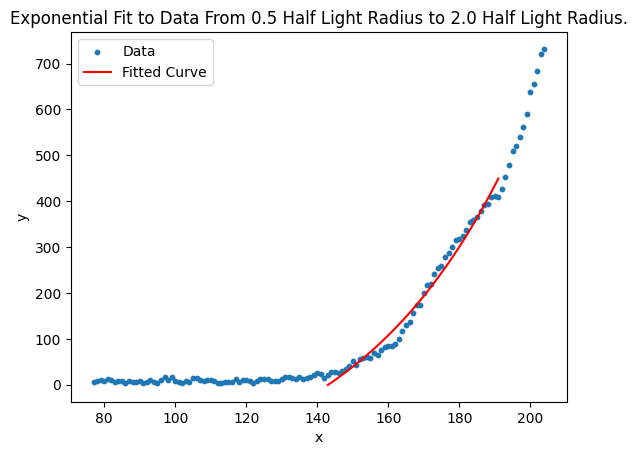

RD for DDO 101 is 2.2125057057992277 kpc for 0.5 Half Light Radius to 2.0 Half Light Radius 


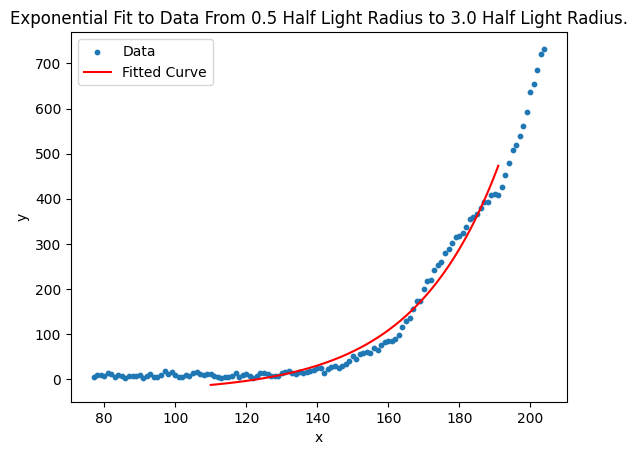

RD for DDO 101 is 1.188920096571068 kpc for 0.5 Half Light Radius to 3.0 Half Light Radius 


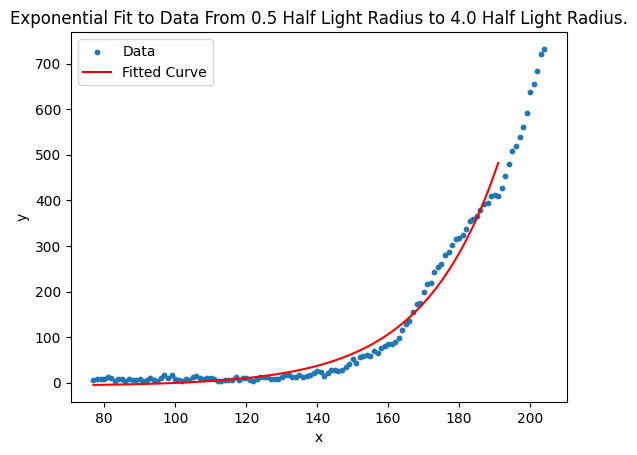

RD for DDO 101 is 1.0493331233427046 kpc for 0.5 Half Light Radius to 4.0 Half Light Radius 


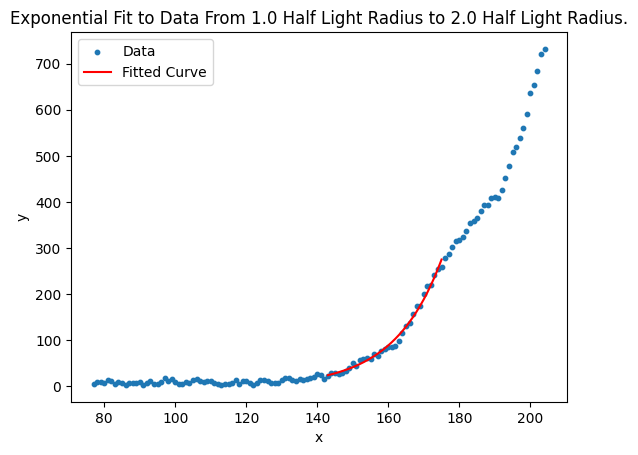

RD for DDO 101 is 0.6608086113773822 kpc for 1.0 Half Light Radius to 2.0 Half Light Radius 


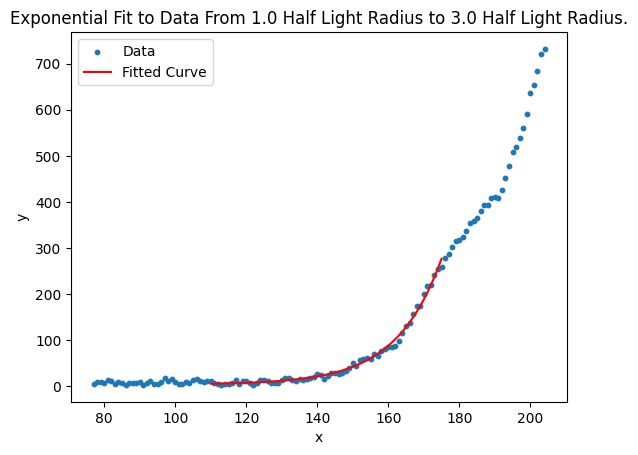

RD for DDO 101 is 0.630401379405691 kpc for 1.0 Half Light Radius to 3.0 Half Light Radius 


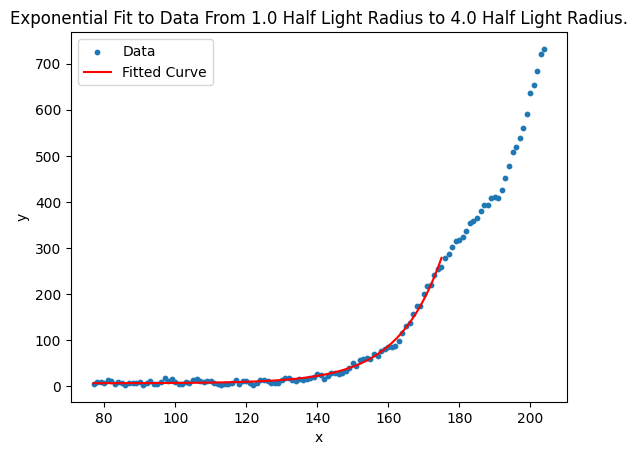

RD for DDO 101 is 0.6096928334128013 kpc for 1.0 Half Light Radius to 4.0 Half Light Radius 


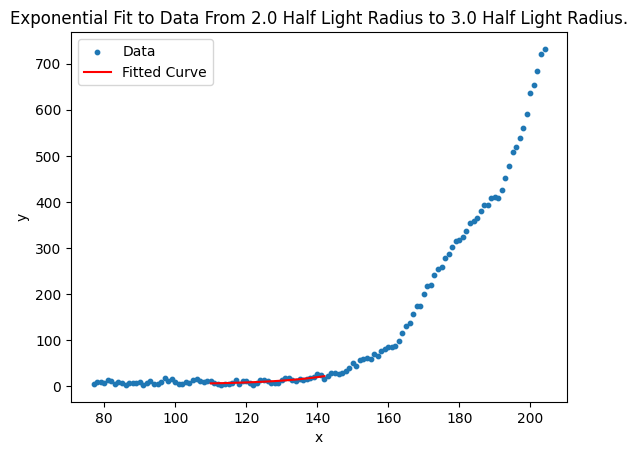

RD for DDO 101 is 0.7546201169241588 kpc for 2.0 Half Light Radius to 3.0 Half Light Radius 


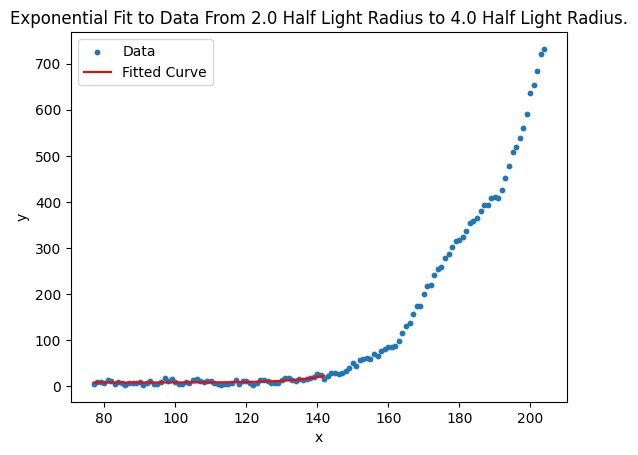

RD for DDO 101 is 0.44436404650769556 kpc for 2.0 Half Light Radius to 4.0 Half Light Radius 


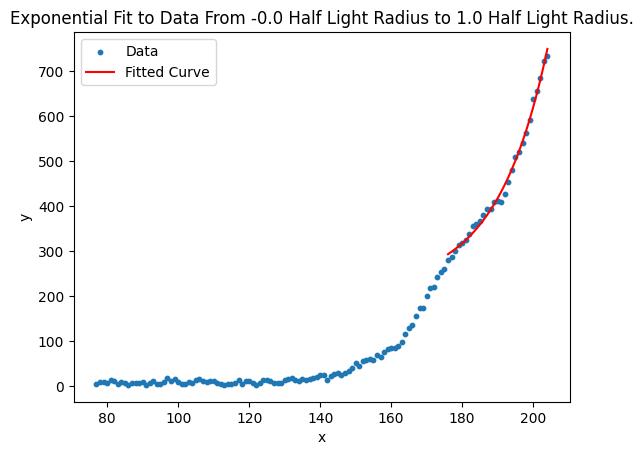

RD for DDO 101 is 0.7075592838519291 kpc for -0.0 Half Light Radius to 1.0 Half Light Radius 


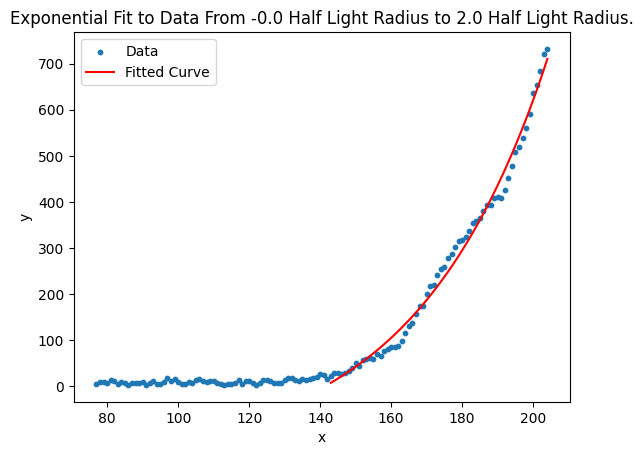

RD for DDO 101 is 1.82956863381748 kpc for -0.0 Half Light Radius to 2.0 Half Light Radius 


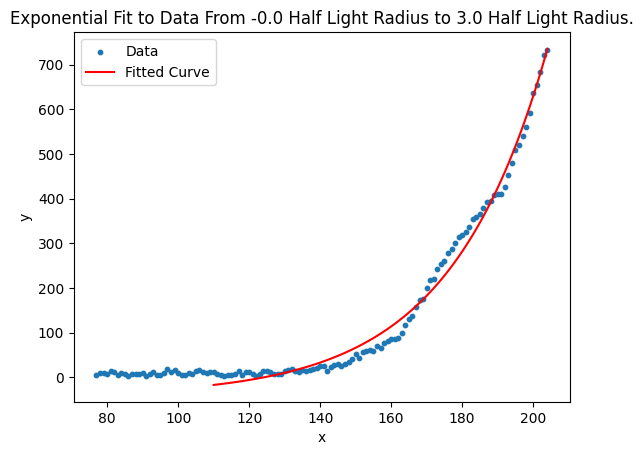

RD for DDO 101 is 1.3560841583055647 kpc for -0.0 Half Light Radius to 3.0 Half Light Radius 


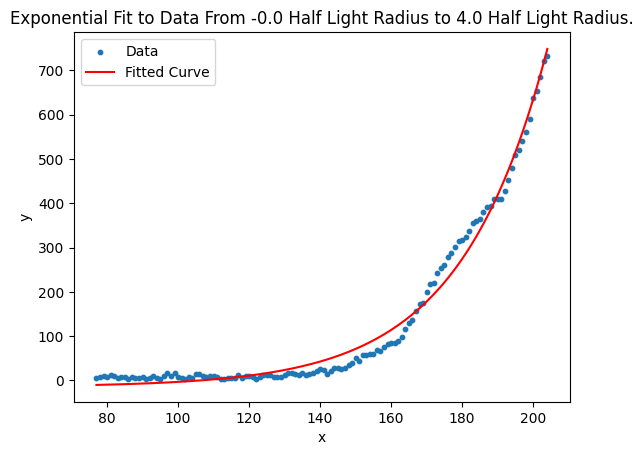

RD for DDO 101 is 1.2223700333456264 kpc for -0.0 Half Light Radius to 4.0 Half Light Radius 
   Range (half light)  RD (kpc)       RMSE
0          0.5 - 2.0   2.212506  17.675710
1           0.5 - 3.0  1.188920  20.573060
2           0.5 - 4.0  1.049333  19.763132
3           1.0 - 2.0  0.660809   6.945687
4           1.0 - 3.0  0.630401   5.533222
5           1.0 - 4.0  0.609693   5.196006
6           2.0 - 3.0  0.754620   3.332588
7           2.0 - 4.0  0.444364   3.586416
8             0.0 - 1  0.707559  10.185065
9           0.0 - 2.0  1.829569  19.651657
10          0.0 - 3.0  1.356084  21.610131
11          0.0 - 4.0  1.222370  21.939698
Paper value 1.32 kpc


In [16]:
def exponential_func(x, a, b, c, x0):
    return a * np.exp(b * (x - x0)) + c

from sklearn.metrics import mean_squared_error
pixel_scale = 1.134

bounds = [[4-2, 4-0.5], [4-3,4-0.5], [4-4, 4-0.5], [4-2, 4-1], [4-3,4-1], [4-4, 4-1], [4-3,4-2], [4-4, 4-2] ,[4-1, 4-0], [4-2, 4-0], [4-3,4-0], [4-4, 4-0]]
print(len(y_values) , len(x_values))
RD_list = []
RMSE_list = []
for bound in bounds:
    lower_bound = float(bound[0])
    higher_bound = float(bound[1])
    x_filtered = x_values[int(lower_bound*a_half) : int(higher_bound * a_half)]
    y_filtered = y_values[int(lower_bound*a_half) : int(higher_bound * a_half)]


    popt, pcov = curve_fit(exponential_func, x_filtered, y_filtered, p0=(1, 0.06, 25, 0))
    y_pred = exponential_func(x_filtered, *popt) 
    rmse = np.sqrt(mean_squared_error(y_filtered, y_pred)) 
    RMSE_list.append(rmse)
    # Plot the results
    plt.scatter(x_values, y_values, label='Data', s=10)
    plt.plot(x_filtered, exponential_func(x_filtered, *popt), 'r-', label='Fitted Curve')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Exponential Fit to Data From {-(higher_bound-4)} Half Light Radius to {-(lower_bound-4)} Half Light Radius.')
    plt.show()
    RD_pixels = 1/popt[1]
    RD_arcsec = RD_pixels * pixel_scale
    RD_value = ((D * RD_arcsec) / 206265)*1000
    print(f"RD for {galaxy_name} is {RD_value} kpc for {-(higher_bound-4)} Half Light Radius to {-(lower_bound-4)} Half Light Radius ")
    RD_list.append(RD_value)
import pandas as pd

# Create a dictionary of data
data = {
    'Range (half light)': [' 0.5 - 2.0 ', '0.5 - 3.0', '0.5 - 4.0', '1.0 - 2.0', '1.0 - 3.0', '1.0 - 4.0', '2.0 - 3.0', '2.0 - 4.0','0.0 - 1', '0.0 - 2.0' , '0.0 - 3.0', '0.0 - 4.0'],
    'RD (kpc)': RD_list,
    'RMSE' : RMSE_list
    
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame as a table
print(df)

print("Paper value 1.32 kpc")


## Bootstarpping

x_ax_left length: 99
x_ax_right length: 99
values_along_line_left length: 99
values_along_line_right length: 99
x_ax combined length: 198
values_along_line combined length: 198


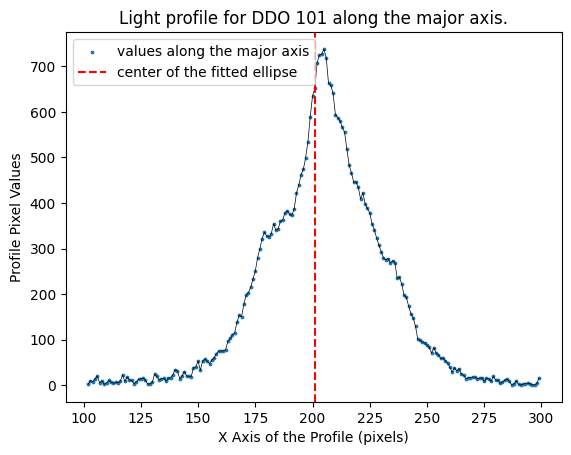

Threshold value: 327.7069308592835
Center of galaxy (Equal Area on both sides of the center line): 205


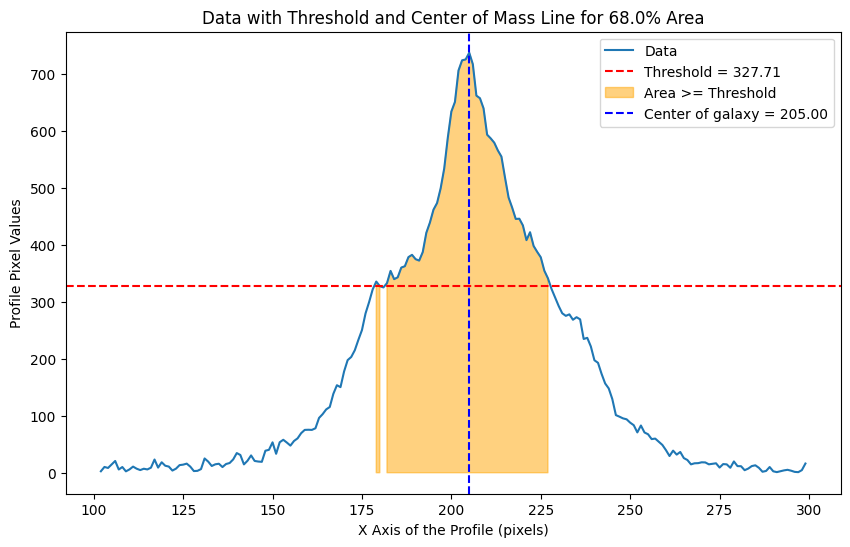

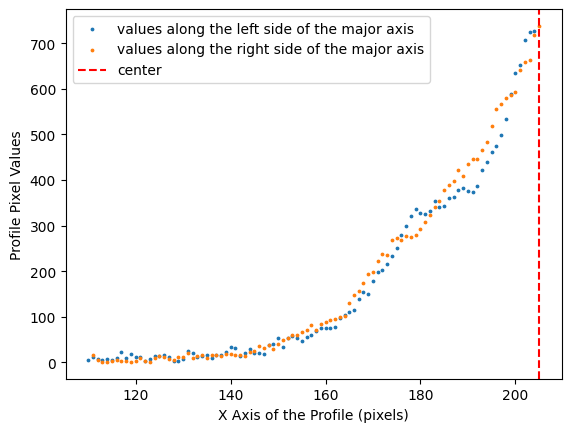

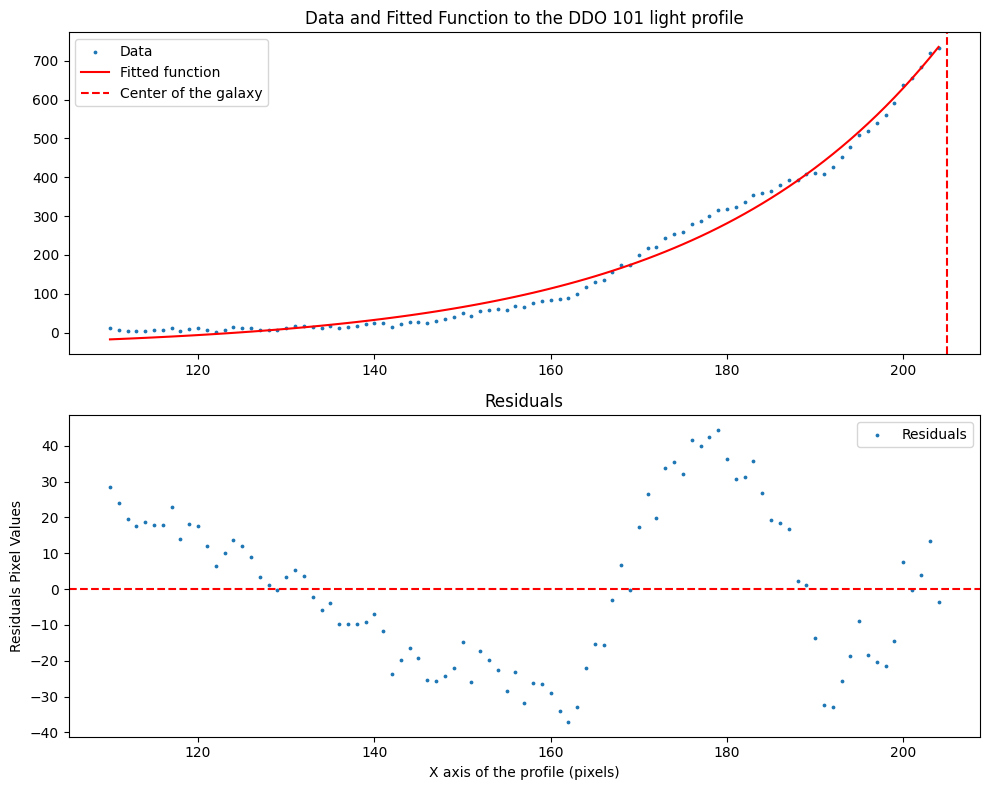

Exponential fit function is a * exp(b * (x - x0)) + c
a is 0.4815 +/- 7288.8251
b is 0.0365 +/- 0.0012
c is -42.6602 +/- 7.0671
x0 is 1.5245 +/- 414875.4429
RD is 27.4067 pixels
RD for DDO 101 is 1.3560841583055647 kpc


In [17]:
RD_pixels , RD_arcsec , y_values , x_values = RD(3, DDO_101, D, 1.134, list_of_ellipse_data, X_center, y_center, galaxy_name, initial_guesses=[1, 0.06, 25, 0])

48.53180214830747


C:\Users\AYSAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


RD values: [1.4297879825477573, 1.366959248556553, 1.3155817622591433, 1.2229601884095107, 1.3825091924375572, 1.3032766708172046, 1.3168639396738095, 1.3681812210612536, 1.426833602112459, 1.4377993817883663, 1.3902961021021079, 1.2748540516319753, 1.4705977446136256, 1.2803803998894634, 1.3260571678744943, 1.6265179735832318, 0.8265440222899035, -0.45426339586682557, 1.42885834859649, 1.3223537149436415, -0.582102782239367, 1.3301460167825148, 1.385320053248503, 1.405312997386593, 1.3206048583591135, 1.3684053161723055, 0.8258332396849654, 1.4641269627291265, 1.3228537681814854, 1.3254727122707983, 1.1794059115022446, 1.4288564802735426, 1.2419191150898536, 1.3685184861155577, 1.332157409563694, 1.4239515673363263, 1.4617471464549765, 1.335445519014873, 0.8261607783544959, 1.4756524053024431, 0.826293565092457, 1.4306057706912685, 0.8259886882634444, 1.4152748911135244, 1.3679543213878573, 1.2123183074938333, 0.5520138568943922, 1.354106150049252, 1.3370873543570543, 1.26326399957362

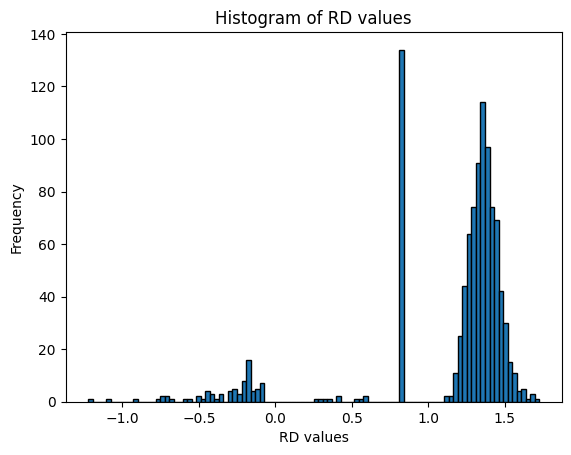

a values: [0.5070148782638818, 0.4620782214689109, 0.41976258289121837, 0.3242358433670673, 1.129752692663509, 2.096190332563004, 0.3457848522910489, 0.6017970164922212, 1.4536467650737654, 1.402674347037053, 0.9652652492535351, 0.28561526663028153, 1.6061345175067, 1.4109868774523044, 0.9542689977190619, 2.0007429851800755, 78.89146318281045, 22.72423643052759, 0.5720062997442453, 3.3748106078801983, 21.709936145846537, 1.7267133071894147, 0.45323045099923526, 0.4477032654036883, 3.5006649542491277, 0.5931133136298574, 48.43137681242087, 1.5678154429288573, 0.25640987724376874, 0.7563884292918305, 2.09165812721127, 1.6899915252187703, 1.5474242888236087, 2.2698477218723596, 0.6902389221801072, 0.504547878712378, 6.32428498806919, 0.35337038976757895, 40.814813676354824, 0.9488448940781982, 143.30087402267378, 1.3939831416995714, 63.953012430132844, 0.9602571537870743, 0.4988843622937126, 0.23915231428202433, -8.586985156474569, 0.3266275335386733, 1.0616369885766341, 0.365920305273116

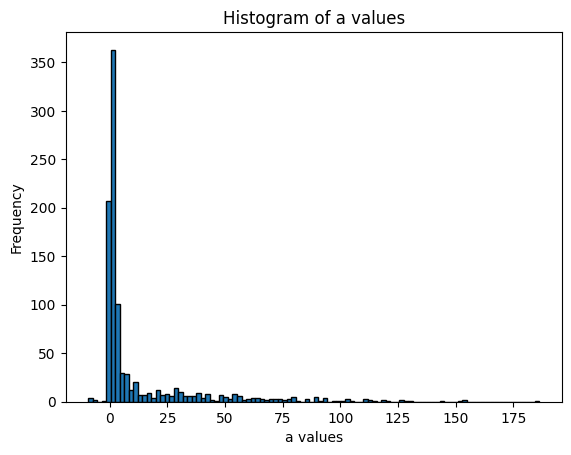

c values: [-63.19920587667857, -53.45071217562838, -30.13640406243966, -18.78586080687245, -54.62247836347544, -28.59848515923528, -19.85488121604081, -43.02823582965266, -56.72406404293329, -52.533099898683105, -44.83413721029235, -30.947762298296432, -67.05965505661267, -30.522713044169144, -45.68335834717258, -74.85431710633546, 177.59784132912137, 185.1729449832864, -50.395150624453755, -28.8122954445861, 165.1005082460547, -35.3655762906602, -37.169475460465975, -34.18898308439797, -34.20973559313692, -48.37439972005076, 175.80481252022304, -57.26170661980057, -44.96759557812789, -39.253954560089284, -14.587601175709981, -47.606005052835556, -23.840613880115267, -41.158408335208634, -33.212642576687536, -42.50701886212383, -40.057980341542155, -32.37920465144285, 171.34718082761034, -49.072303044937165, 168.5534928313808, -49.22043684677091, 180.08700454960862, -44.13512729278808, -45.933672761401425, -21.70088472699204, 182.73610832567618, -46.6187644049302, -28.910914989464928, 

In [18]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np

# Define the exponential function
def exponential_func(x, a, b, c, x0):
    return a * np.exp(b * (x - x0)) + c

# Assume DDO_101 and y_values are defined
sigma = np.std(DDO_101)
print(sigma)

# Number of iterations
n = 1000

# Lists to store the fitted parameters
a_list = []
b_list = []
c_list = []
x0_list = []
RD_list = []

# Loop for bootstrapping
for i in range(n):
    # Generate unique random noise for each data point from the normal distribution
    noise = np.random.normal(0, sigma, size=len(y_values))
    # Add unique noise to each data point in y_values
    y_noisy = y_values + noise
    # Fit the exponential function to the noisy data
    popt, pcov = curve_fit(exponential_func, x_values, y_noisy, p0=(1, 0.06, 25, 0))
    
    # Append the parameters to the respective lists
    a_list.append(popt[0])
    b_list.append(popt[1])
    RD_pixels = 1/popt[1]
    RD_arcsec = RD_pixels * pixel_scale
    RD_value = ((D * RD_arcsec) / 206265)*1000
    RD_list.append(RD_value)
    c_list.append(popt[2])
    x0_list.append(popt[3])



print(f"RD values: {RD_list}")
plt.hist(RD_list, bins=100, edgecolor='k')
plt.xlabel('RD values')
plt.ylabel('Frequency')
plt.title('Histogram of RD values')
plt.show()

# Print the fitted parameters
print(f"a values: {a_list}")
plt.hist(a_list, bins=100, edgecolor='k')
plt.xlabel('a values')
plt.ylabel('Frequency')
plt.title('Histogram of a values')
plt.show()
print(f"c values: {c_list}")
print(f"x0 values: {x0_list}")


## SFR

In [19]:
H_alpha_101 = np.array(ltf.open_fits(r"C:\Users\AYSAN\Desktop\project\Galaxy\Data\DDO 101\d101hmrms.fits"))

sum_H_alpha = np.sum(H_alpha_101)

RD_circle = np.pi * (RD_pixels**2)
SFR = sum_H_alpha/RD_circle

print(f"SFR for {galaxy_name} is {SFR}")

SFR for DDO 101 is 743.0739533257441


# DDO 133

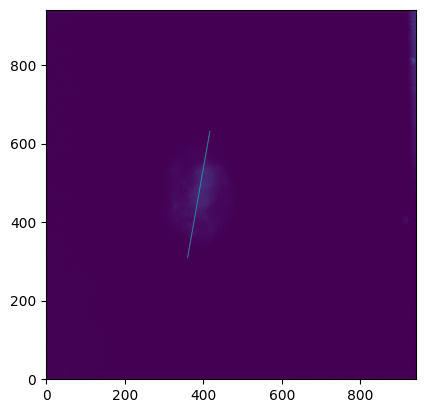

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


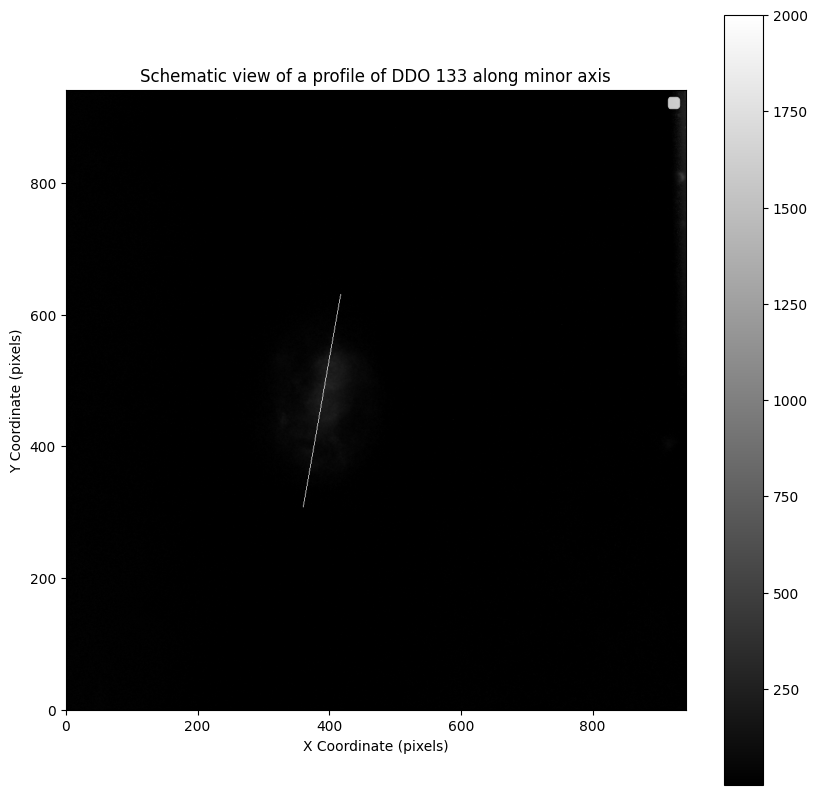

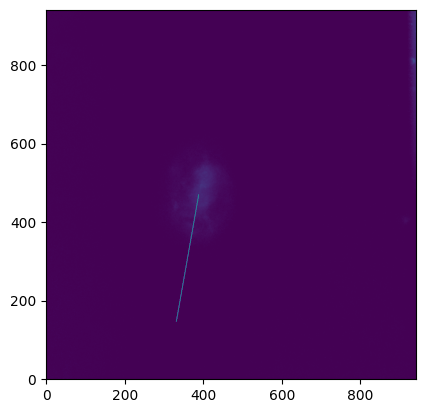

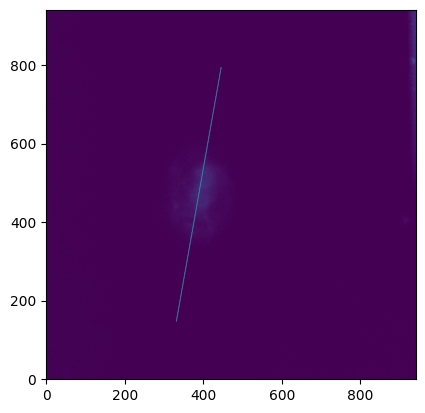

y_ax_left length: 324
y_ax_right length: 324
values_along_line_left length: 324
values_along_line_right length: 324
y_ax combined length: 648
values_along_line combined length: 648


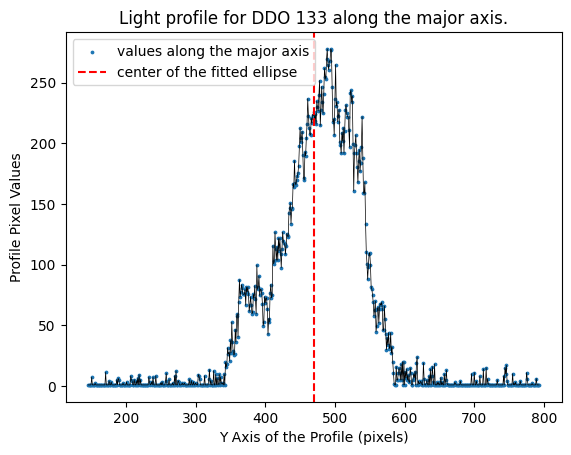

Threshold value: 142.77030992743408
Center of galaxy (Equal Area on both sides of the center line): 482


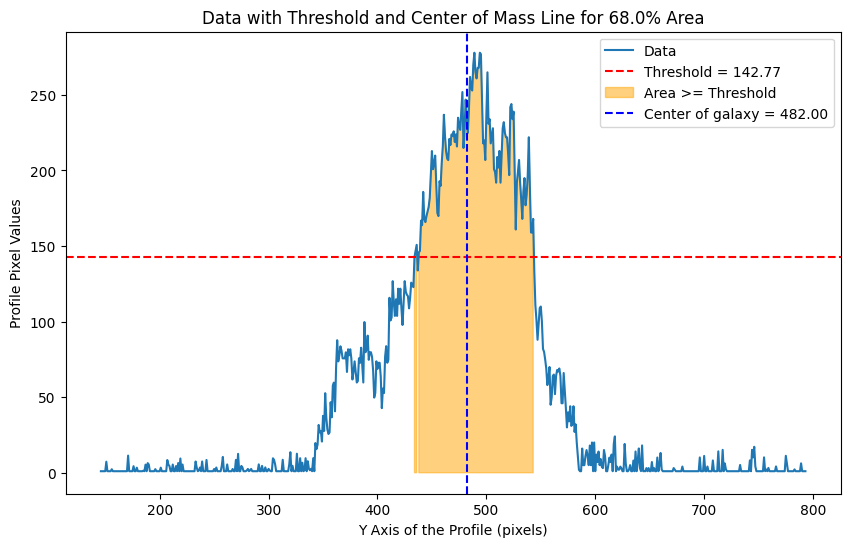

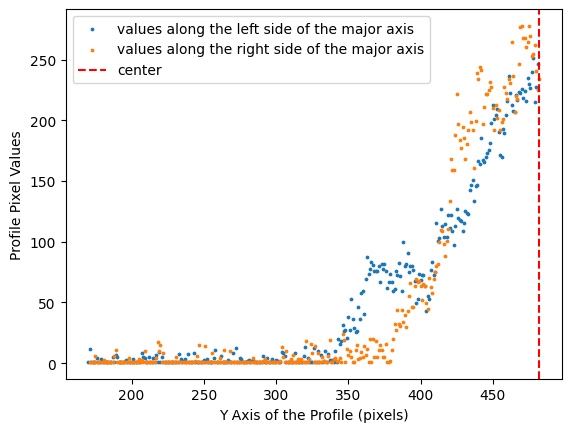

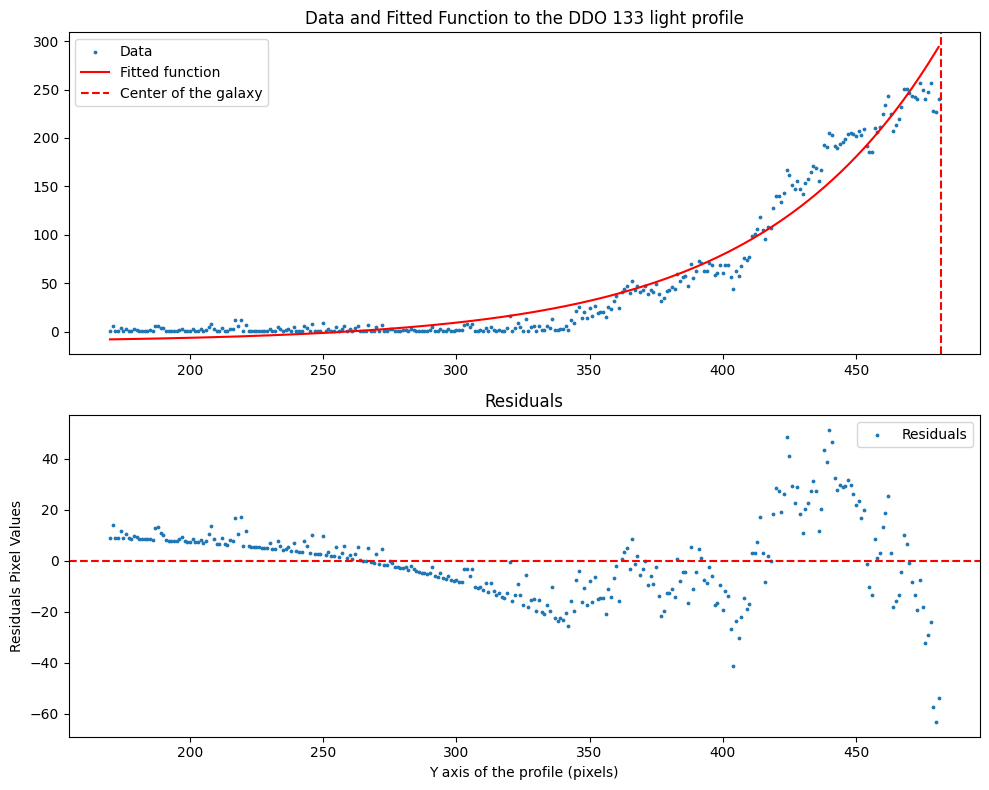

Exponential fit function is a * exp(b * (x - x0)) + c
a is 0.2210 +/- 916.9278
b is 0.0150 +/- 0.0004
c is -11.0002 +/- 1.8550
x0 is -0.6211 +/- 276900.6461
RD is 66.6142 pixels
RD for DDO 133 is 2.2340057123670056 kpc


In [26]:
galaxy_name = "DDO 133"
D = 6.1
x_start = 75
y_start = 150
a_half = 81
b_half = 51
theta_deg = -10 + 90 
X_center = 314 + x_start
y_center = 320 + y_start


visual_133 = np.array(ltf.open_fits(r"C:\Users\AYSAN\Desktop\project\Galaxy\Starless images\DDO 133\non_shifted_background_d133v.fits"))

'''
theta_rad = np.radians(theta_deg)
list_of_ellipse_data = [theta_rad , a_half, b_half]
x_ax_left = np.arange(X_center -49, X_center)
x_ax_right = np.arange(X_center, X_center + 49)
x_ax = np.concatenate((x_ax_left, x_ax_right))

def get_line_values(array, X_center, y_center, x_ax, theta_rad): 
        m = np.tan(theta_rad)
        values = [] 
        y_list = [] 
        for x in x_ax: 
            y = int(m * (x) + y_center - m*X_center) 
            values.append(array[y, x]) 
            array[y, x] = 3000 
            y_list.append(y) 
        return values, y_list

get_line_values(visual_133, X_center, y_center, x_ax, theta_rad)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(visual_133, cmap='gray', origin='lower')
cbar = plt.colorbar(im, ax=ax)
cbar.set_label(" ")

plt.title(f"Schematic view of a profile of {galaxy_name} along major axis")
plt.xlabel('X Coordinate (pixels)')
plt.ylabel('Y Coordinate (pixels)')
plt.legend()
plt.show()
'''
theta_rad = np.radians(theta_deg)
list_of_ellipse_data = [theta_rad, a_half, b_half]
y_ax_left = np.arange(y_center - 2 * a_half, y_center)
y_ax_right = np.arange(y_center, y_center + 2*a_half)
y_ax = np.concatenate((y_ax_left, y_ax_right))

def get_line_values(array, X_center, y_center, y_ax, theta_rad): 
    m = np.tan(theta_rad)
    values = [] 
    x_list = [] 
    for y in y_ax: 
        x = int((y - y_center + m * X_center) / m)
        values.append(array[y, x]) 
        array[y, x] = 2000 
        x_list.append(x) 
    plt.imshow(array, origin = 'lower')
    plt.show()
    return values, x_list

get_line_values(visual_133, X_center, y_center, y_ax, theta_rad)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(visual_133, cmap='gray', origin='lower')
cbar = plt.colorbar(im, ax=ax)
cbar.set_label(" ")

plt.title(f"Schematic view of a profile of {galaxy_name} along minor axis")
plt.xlabel('X Coordinate (pixels)')
plt.ylabel('Y Coordinate (pixels)')
plt.legend()
plt.show()



DDO_133 = np.array(ltf.open_fits(r"C:\Users\AYSAN\Desktop\project\Galaxy\Starless images\DDO 133\non_shifted_background_d133v.fits"))


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def RD(image, distance, pixel_scale, list_of_ellipse_data, center_of_galaxy_x, center_of_galaxy_y, galaxy_name, ratio=0.68, initial_guesses=[45, 0.1, 25, 0]):
    theta_rad, a, b = list_of_ellipse_data
    
     
    center_of_galaxy_y = int(center_of_galaxy_y)
    
    y_ax_left = np.arange(y_center - 4 * a_half, y_center)
    y_ax_right = np.arange(y_center, y_center + 4*a_half)
    
    values_along_line_left, x_list_left = get_line_values(image, center_of_galaxy_x, center_of_galaxy_y, y_ax_left, theta_rad)
    values_along_line_right, x_list_right = get_line_values(image, center_of_galaxy_x, center_of_galaxy_y, y_ax_right, theta_rad)
    
    y_ax = np.concatenate((y_ax_left, y_ax_right))
    x_ax = np.concatenate((x_list_left, x_list_right))
    values_along_line = np.concatenate((values_along_line_left, values_along_line_right))

    # Add print statements to debug the lengths
    print(f"y_ax_left length: {len(y_ax_left)}")
    print(f"y_ax_right length: {len(y_ax_right)}")
    print(f"values_along_line_left length: {len(values_along_line_left)}")
    print(f"values_along_line_right length: {len(values_along_line_right)}")
    print(f"y_ax combined length: {len(y_ax)}")
    print(f"values_along_line combined length: {len(values_along_line)}")

    if len(y_ax) == len(values_along_line):
        plt.scatter(y_ax, values_along_line, s=3, label='values along the major axis')
        plt.plot(y_ax, values_along_line, color="black", linewidth=0.5)
        plt.title(f"Light profile for {galaxy_name} along the major axis.")
        plt.axvline(x=center_of_galaxy_y, color='r', linestyle='--', label='center of the fitted ellipse')
        plt.xlabel("Y Axis of the Profile (pixels)")
        plt.ylabel("Profile Pixel Values")
        plt.legend()
        plt.show()
    else:
        print("The lengths of y_ax and values_along_line do not match.")
        print(len(y_ax))
        print(len(values_along_line))
        return
    
    values_along_line = np.array(values_along_line)
    y_ax = np.array(y_ax)
    
    total_area = np.trapz(values_along_line, x=y_ax)
    
    sorted_values = np.sort(values_along_line)[::-1]
    cumulative_area = np.cumsum(sorted_values) * (y_ax[1] - y_ax[0])
    
    threshold_index = np.searchsorted(cumulative_area, ratio * total_area)
    threshold_value = sorted_values[threshold_index]
    
    filtered_values = values_along_line[values_along_line > threshold_value]
    filtered_y_ax = y_ax[values_along_line > threshold_value]
    
    cumulative_intensity = np.cumsum(values_along_line)
    total_intensity = cumulative_intensity[-1]
    
    com_index = np.searchsorted(cumulative_intensity, total_intensity / 2)
    center_of_mass_y = y_ax[com_index]
    center_of_mass_x = x_ax[com_index]
    print(f"Threshold value: {threshold_value}")
    print(f"Center of galaxy (Equal Area on both sides of the center line): {center_of_mass_y}")
    
    plt.figure(figsize=(10, 6))
    plt.plot(y_ax, values_along_line, label='Data')
    plt.axhline(y=threshold_value, color='r', linestyle='--', label=f'Threshold = {threshold_value:.2f}')
    plt.fill_between(y_ax, values_along_line, where=(values_along_line >= threshold_value), color='orange', alpha=0.5, label='Area >= Threshold')
    plt.axvline(x=center_of_mass_y, color='blue', linestyle='--', label=f'Center of galaxy = {center_of_mass_y:.2f}')
    plt.legend()
    plt.xlabel("Y Axis of the Profile (pixels)")
    plt.ylabel("Profile Pixel Values")
    plt.title(f'Data with Threshold and Center of Mass Line for {ratio * 100}% Area')
    plt.show()

    values_along_line_left = values_along_line[:com_index]
    values_along_line_right = values_along_line[com_index:]

    y_ax_left = y_ax[:com_index]
    y_ax_right = y_ax[com_index:]

    if len(y_ax_left) > len(y_ax_right):
        delete = len(y_ax_left) - len(y_ax_right)
        y_ax_left = y_ax_left[delete:]
        values_along_line_left = values_along_line_left[delete:]
    elif len(y_ax_left) < len(y_ax_right):
        delete = len(y_ax_right) - len(y_ax_left)
        y_ax_right = y_ax_right[:-delete]
        values_along_line_right = values_along_line_right[:-delete]

    flipped_y_ax_right = []
    for i in range(len(y_ax_right)):
        y = (2 * center_of_mass_y - y_ax_right[i])
        flipped_y_ax_right.append(int(y))

    flipped_y_ax_right = np.array(flipped_y_ax_right)

    plt.scatter(y_ax_left, values_along_line_left, s=3, label='values along the left side of the major axis')
    plt.scatter(flipped_y_ax_right, values_along_line_right, s=3, label='values along the right side of the major axis')
    plt.axvline(x=center_of_mass_y, color='r', linestyle='--', label='center')
    plt.xlabel("Y Axis of the Profile (pixels)")
    plt.ylabel("Profile Pixel Values")
    plt.legend()
    plt.show()
    
    x1 = y_ax_left  
    x2 = flipped_y_ax_right
    y1 = values_along_line_left
    y2 = values_along_line_right[::-1]
    mean_y = (y1 + y2) / 2
    
    def exponential_func(x, a, b, c, x0):
        return a * np.exp(b * (x - x0)) + c

    popt, pcov = curve_fit(exponential_func, y_ax_left, mean_y, p0=initial_guesses)

    plt.figure(figsize=(10, 8))

    plt.subplot(2, 1, 1)
    plt.scatter(y_ax_left, mean_y, s=3, label='Data')
    plt.plot(y_ax_left, exponential_func(y_ax_left, *popt), label='Fitted function', color='red')
    plt.axvline(x=center_of_mass_y, color='r', linestyle='--', label='Center of the galaxy')
    plt.legend()
    plt.title(f'Data and Fitted Function to the {galaxy_name} light profile')
    residuals = mean_y - exponential_func(y_ax_left, *popt) 
    plt.subplot(2, 1, 2) 
    plt.scatter(y_ax_left, residuals, s=3, label='Residuals') 
    plt.axhline(0, color='red', linestyle='--') 
    plt.legend() 
    plt.xlabel('Y axis of the profile (pixels)') 
    plt.ylabel('Residuals Pixel Values') 
    plt.title('Residuals') 
    plt.tight_layout() 
    plt.show()
    
    perr = np.sqrt(np.diag(pcov))
    print("Exponential fit function is a * exp(b * (x - x0)) + c")
    print(f"a is {popt[0]:.4f} +/- {perr[0]:.4f}")
    print(f"b is {popt[1]:.4f} +/- {perr[1]:.4f}")
    print(f"c is {popt[2]:.4f} +/- {perr[2]:.4f}")
    print(f"x0 is {popt[3]:.4f} +/- {perr[3]:.4f}")
    print(f"RD is {1/popt[1]:.4f} pixels")
    
    RD_pixels = 1 / popt[1]
    RD_arcsec = RD_pixels * pixel_scale
    RD_value = ((distance * RD_arcsec) / 206265) * 1000
    print(f"RD for {galaxy_name} is {RD_value} kpc")
    return RD_pixels , RD_arcsec , y_ax_left, mean_y

RD_pixels , RD_arcsec, y_values, y_vlaues = RD(DDO_133, D, 1.134, list_of_ellipse_data, X_center, y_center, galaxy_name, initial_guesses=[1, 0.06, 25, 0])

In [25]:
def exponential_func(x, a, b, c, x0):
    return a * np.exp(b * (x - x0)) + c

from sklearn.metrics import mean_squared_error
pixel_scale = 1.134

bounds = [[4-2, 4-0.5], [4-3,4-0.5], [4-4, 4-0.5], [4-2, 4-1], [4-3,4-1], [4-4, 4-1], [4-3,4-2], [4-4, 4-2] ,[4-1, 4-0], [4-2, 4-0], [4-3,4-0], [4-4, 4-0]]
print(len(y_values) , len(x_values))
RD_list = []
RMSE_list = []
for bound in bounds:
    lower_bound = float(bound[0])
    higher_bound = float(bound[1])
    x_filtered = x_values[int(lower_bound*a_half) : int(higher_bound * a_half)]
    y_filtered = y_values[int(lower_bound*a_half) : int(higher_bound * a_half)]


    popt, pcov = curve_fit(exponential_func, x_filtered, y_filtered, p0=(1, 0.06, 25, 0))
    y_pred = exponential_func(x_filtered, *popt) 
    rmse = np.sqrt(mean_squared_error(y_filtered, y_pred)) 
    RMSE_list.append(rmse)
    # Plot the results
    plt.scatter(x_values, y_values, label='Data', s=10)
    plt.plot(x_filtered, exponential_func(x_filtered, *popt), 'r-', label='Fitted Curve')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Exponential Fit to Data From {-(higher_bound-4)} Half Light Radius to {-(lower_bound-4)} Half Light Radius.')
    plt.show()
    RD_pixels = 1/popt[1]
    RD_arcsec = RD_pixels * pixel_scale
    RD_value = ((D * RD_arcsec) / 206265)*1000
    print(f"RD for {galaxy_name} is {RD_value} kpc for {-(higher_bound-4)} Half Light Radius to {-(lower_bound-4)} Half Light Radius ")
    RD_list.append(RD_value)
import pandas as pd

# Create a dictionary of data
data = {
    'Range (half light)': [' 0.5 - 2.0 ', '0.5 - 3.0', '0.5 - 4.0', '1.0 - 2.0', '1.0 - 3.0', '1.0 - 4.0', '2.0 - 3.0', '2.0 - 4.0','0.0 - 1', '0.0 - 2.0' , '0.0 - 3.0', '0.0 - 4.0'],
    'RD (kpc)': RD_list,
    'RMSE' : RMSE_list
    
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Display the DataFrame as a table
print(df)

print("Paper value 1.32 kpc")


312 95


ValueError: operands could not be broadcast together with shapes (0,) (121,) 

## SFR

In [21]:
H_alpha_133 = np.array(ltf.open_fits(r"C:\Users\AYSAN\Desktop\project\Galaxy\Data\DDO 133\d133hmrms.fits"))

sum_H_alpha = np.sum(H_alpha_133)
print(sum_H_alpha)
RD_circle = np.pi * (RD_kpc**2)
SFR = sum_H_alpha/RD_circle

print(f"SFR for {galaxy_name} is {SFR}")

955883.0
SFR for DDO 133 is 2213768.7994459127


# DDO 69

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


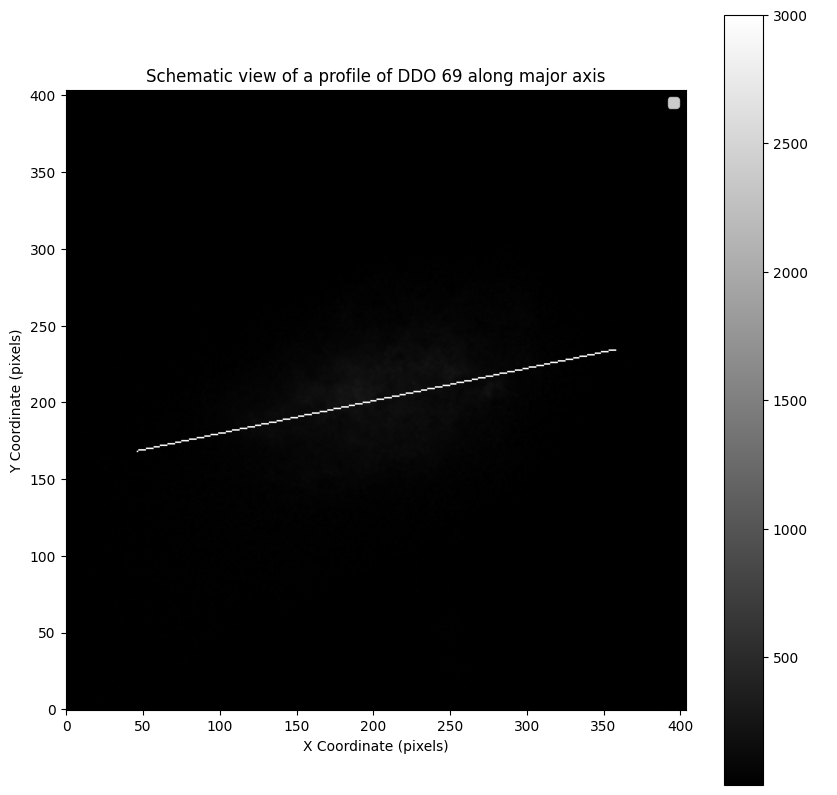

IndexError: index 404 is out of bounds for axis 1 with size 404

In [22]:
galaxy_name = "DDO 69"
D = 0.8
x_start = 225
y_start = 300
a_half = 78
b_half = 40
theta_deg = 12
X_center = 202
y_center = 202

visual_69 = np.array(ltf.open_fits(r"C:\Users\AYSAN\Desktop\project\Galaxy\Starless images\DDO69\non_shifted_background_d69v.fits"))
visual_69 = visual_69[y_start:y_start + int(2 * X_center), x_start: int(x_start + 2 * y_center)]

theta_rad = np.radians(theta_deg)
list_of_ellipse_data = [theta_rad , a_half, b_half]
x_ax_left = np.arange(X_center - 2*a_half, X_center)
x_ax_right = np.arange(X_center, X_center + 2*a_half)
x_ax = np.concatenate((x_ax_left, x_ax_right))

def get_line_values(array, X_center, y_center, x_ax, theta_rad): 
        m = np.tan(theta_rad)
        values = [] 
        y_list = [] 
        for x in x_ax: 
            y = int(m * (x) + y_center - m*X_center) 
            values.append(array[y, x]) 
            array[y, x] = 3000 
            y_list.append(y) 
        return values, y_list

get_line_values(visual_69, X_center, y_center, x_ax, theta_rad)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(visual_69, cmap='gray', origin='lower')
cbar = plt.colorbar(im, ax=ax)
cbar.set_label(" ")

plt.title(f"Schematic view of a profile of {galaxy_name} along major axis")
plt.xlabel('X Coordinate (pixels)')
plt.ylabel('Y Coordinate (pixels)')
plt.legend()
plt.show()

DDO_69 = np.array(ltf.open_fits(r"C:\Users\AYSAN\Desktop\project\Galaxy\Starless images\DDO69\non_shifted_background_d69v.fits"))
DDO_69 = DDO_69[y_start:y_start + int(2 * X_center), x_start: int(x_start + 2 * y_center)]


RD(DDO_69, D, 1.134, list_of_ellipse_data, X_center, y_center, galaxy_name, initial_guesses=[1, 0.06, 25, 0])